<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/ANN_Gridsearchcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
TrainPd=pd.read_excel("Concrete_Data.xls")
#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

#Verification des valeur manquantes
TrainPd.isna().sum()

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 1)

#Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_train)
MinMaxScaler(copy=(), feature_range=(0,1))
# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)




In [2]:
# Créer le modèle MLPRegressor
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,), learning_rate='constant', learning_rate_init=0.1,
                      activation='relu',
                      solver='lbfgs',
                      random_state=77,
                      max_iter=1000)


#Entraînement du modèle sur les données d'apprentissage
mlp.fit(X_train, Y_train)

#prediction sur les données de test
y_pred=mlp.predict(X_test)
y_pred

array([33.05661121, 21.6373468 , 23.55315888, 21.87906175, 35.39181731,
       48.06563905, 24.1950771 , 39.71243203, 31.55568242, 39.08031614,
       46.08374309, 19.38081103, 27.67564066, 28.47736194, 13.13091299,
       26.87369349, 57.31433701, 44.32783203, 51.22605415, 34.37647575,
       23.27883347, 38.04467228, 22.41959393, 46.9199114 , 58.78372255,
       33.15739587, 32.01189508, 28.30166586, 33.07664465, 24.22433542,
       71.25725742, 51.36412895, 24.39880315, 35.09067588, 54.83579947,
       33.96086876, 25.72941045, 22.87317149, 31.25592264, 29.01220293,
       52.24225766, 24.08028471, 54.65895058, 35.89226867, 33.23778801,
       34.62907737, 26.73416835, 28.80862961, 53.29806787, 38.51232578,
       21.44255079, 29.90374324, 65.18350742, 60.3444101 , 58.75366138,
       18.44285864, 50.18914998, 25.2490987 , 23.47003207, 32.40689796,
       59.19645767, 72.10528751, 48.08254066, 40.76247034, 34.63392638,
       42.313824  , 46.94537916, 34.64540153, 30.14634343, 26.84

In [ ]:
Y.value_counts()

33.398217    5
77.297154    4
31.350474    4
71.298713    4
35.301171    4
            ..
56.633559    1
26.048403    1
30.219733    1
16.278528    1
32.401235    1
Name: strength, Length: 938, dtype: int64

In [3]:
from sklearn.metrics import *
print('MAE : ',mean_absolute_error(Y_test, y_pred))
print('MSE : ',mean_squared_error(Y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R-squared (R²) :", r2_score(Y_test, y_pred))

MAE :  8.842883479999365
MSE :  124.92400848116259
RMSE :  11.176940926799363
R-squared (R²) : 0.5208063107626901


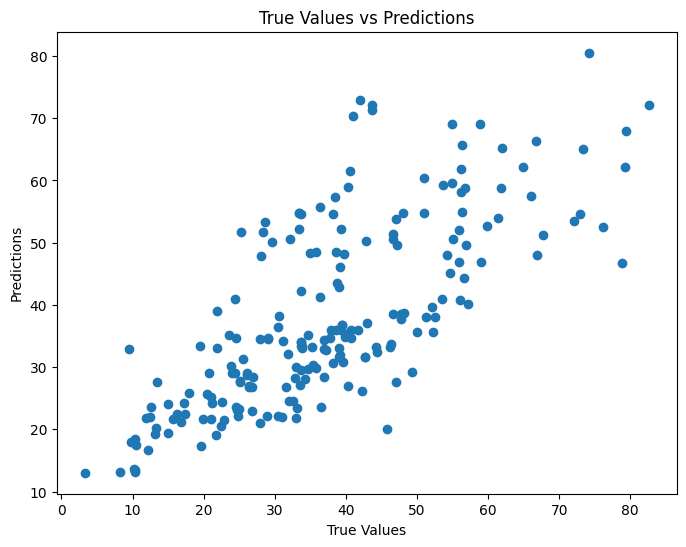

In [4]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

## Techniques Of Hyper Parameter **Optimization**

In [5]:
# Créer un dictionnaire des hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500,700, 1000],
}


# **RandomizedSearchCV**

In [6]:
from sklearn.model_selection import RandomizedSearchCV

# Créer le modèle MLPRegressor
mlp = MLPRegressor(random_state=77)

# Définir la grille des hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 700, 1000],
}

# Recherche des meilleurs hyperparamètres avec RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=77)
random_search.fit(X_train_transformed, Y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés :")
print(random_search.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_transoformed)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error on test set with best model: {mse}")


Meilleurs hyperparamètres trouvés :
{'solver': 'lbfgs', 'max_iter': 700, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50,), 'alpha': 0.5, 'activation': 'logistic'}
Mean Squared Error on test set with best model: 33.32563632420614


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
# Évaluer le modèle avec les meilleurs hyperparamètres
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_transoformed)

print('MAE : ',mean_absolute_error(Y_test, y_pred))
print('MSE : ',mean_squared_error(Y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R-squared (R²) :", r2_score(Y_test, y_pred))

MAE :  4.0128425729759405
MSE :  33.32563632420614
RMSE :  5.772836072868009
R-squared (R²) : 0.8721668091623453


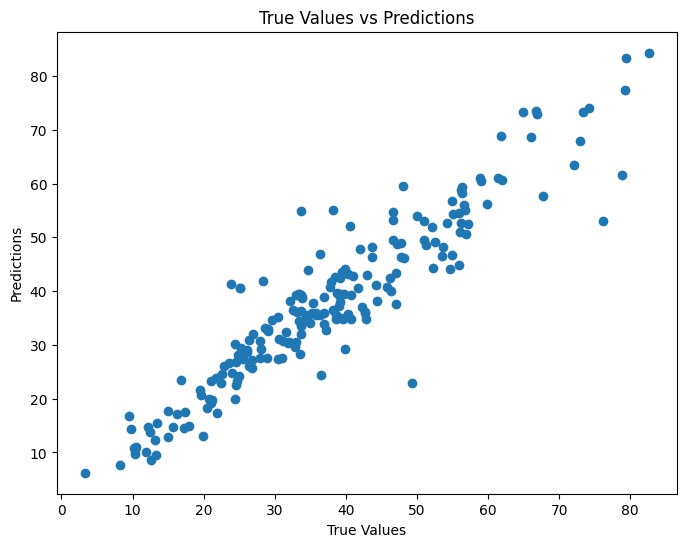

In [8]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# **GridSearchCV**

In [15]:
from sklearn.model_selection import GridSearchCV
# Récupérer les meilleurs hyperparamètres trouvés
best_params_random = random_search.best_params_

# Construire une nouvelle grille autour des meilleurs hyperparamètres
param_grid_gridsearch = {
    'hidden_layer_sizes': [(best_params_random['hidden_layer_sizes'],),
     (best_params_random['hidden_layer_sizes'][0] - 15,), (best_params_random['hidden_layer_sizes'][0] - 10,),
     (best_params_random['hidden_layer_sizes'][0] - 5,), (best_params_random['hidden_layer_sizes'][0] + 5,),
     (best_params_random['hidden_layer_sizes'][0] + 10,), (best_params_random['hidden_layer_sizes'][0] + 15,)],
    'activation': [best_params_random['activation']],
    'solver': [best_params_random['solver']],
    'alpha': [best_params_random['alpha'] - 0.1, best_params_random['alpha'] - 0.05,
             best_params_random['alpha'] - 0.01, best_params_random['alpha'] - 0.02,
             best_params_random['alpha'] - 0.03, best_params_random['alpha'] - 0.04,
             best_params_random['alpha'],
             best_params_random['alpha'] + 0.1, best_params_random['alpha'] + 0.05,
             best_params_random['alpha'] + 0.01, best_params_random['alpha'] + 0.02,
             best_params_random['alpha'] + 0.03, best_params_random['alpha'] + 0.04,],
    'learning_rate': [best_params_random['learning_rate']],
    'max_iter': [best_params_random['max_iter']],}


# Recherche des meilleurs hyperparamètres avec GridSearchCV basé sur les résultats de RandomizedSearchCV
grid_search = GridSearchCV(mlp, param_grid=param_grid_gridsearch, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_transformed, Y_train)

# Afficher les meilleurs hyperparamètres trouvés par GridSearchCV
print("Meilleurs hyperparamètres trouvés par GridSearchCV :")
print(grid_search.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres de GridSearchCV sur l'ensemble de test
best_model_gridsearch = grid_search.best_estimator_
y_pred_gridsearch = best_model_gridsearch.predict(X_test_transoformed)
mse_gridsearch = mean_squared_error(Y_test, y_pred_gridsearch)
print(f"Mean Squared Error on test set with best model found by GridSearchCV: {mse_gridsearch}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
65 fits failed out of a total of 455.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 454, in _fit
    self._initialize(y, layer_units,

Meilleurs hyperparamètres trouvés par GridSearchCV :
{'activation': 'logistic', 'alpha': 0.52, 'hidden_layer_sizes': (35,), 'learning_rate': 'invscaling', 'max_iter': 700, 'solver': 'lbfgs'}
Mean Squared Error on test set with best model found by GridSearchCV: 32.387129203886396


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [14]:
# Construire une nouvelle grille autour des meilleurs hyperparamètres
# Récupérer les meilleurs hyperparamètres trouvés
best_params_random = random_search.best_params_
param_grid_gridsearch = {
    'hidden_layer_sizes': [(best_params_random['hidden_layer_sizes'],),
     (best_params_random['hidden_layer_sizes'][0] - 15,), (best_params_random['hidden_layer_sizes'][0] - 10,),
     (best_params_random['hidden_layer_sizes'][0] - 5,), (best_params_random['hidden_layer_sizes'][0] + 5,),
     (best_params_random['hidden_layer_sizes'][0] + 10,), (best_params_random['hidden_layer_sizes'][0] + 15,)],
    'activation': [best_params_random['activation']],
    'solver': [best_params_random['solver']],
    'alpha': [best_params_random['alpha'] - 0.1, best_params_random['alpha'] - 0.05,
             best_params_random['alpha'] - 0.01, best_params_random['alpha'] - 0.02,
             best_params_random['alpha'] - 0.03, best_params_random['alpha'] - 0.04,
             best_params_random['alpha'],
             best_params_random['alpha'] + 0.1, best_params_random['alpha'] + 0.05,
             best_params_random['alpha'] + 0.01, best_params_random['alpha'] + 0.02,
             best_params_random['alpha'] + 0.03, best_params_random['alpha'] + 0.04,],
    'learning_rate': [best_params_random['learning_rate']],
    'max_iter': [best_params_random['max_iter']],}
print(param_grid_gridsearch)


{'hidden_layer_sizes': [((50,),), (35,), (40,), (45,), (55,), (60,), (65,)], 'activation': ['logistic'], 'solver': ['lbfgs'], 'alpha': [0.4, 0.45, 0.49, 0.48, 0.47, 0.46, 0.5, 0.6, 0.55, 0.51, 0.52, 0.53, 0.54], 'learning_rate': ['invscaling'], 'max_iter': [700]}


In [16]:
# Évaluer le modèle avec les meilleurs hyperparamètres
best_model_gridsearch = grid_search.best_estimator_
y_pred_gridsearch = best_model_gridsearch.predict(X_test_transoformed)

mae_gridsearch = mean_absolute_error(Y_test, y_pred_gridsearch)
mse_gridsearch = mean_squared_error(Y_test, y_pred_gridsearch)
rmse_gridsearch = np.sqrt(mean_squared_error(Y_test, y_pred_gridsearch))
r_squared_gridsearch = r2_score(Y_test, y_pred_gridsearch)

print(f"Mean Squared Error on test set with best model found by GridSearchCV: {mae_gridsearch}")
print(f"Mean Squared Error on test set with best model found by GridSearchCV: {mse_gridsearch}")
print(f"Mean Squared Error on test set with best model found by GridSearchCV: {rmse_gridsearch}")
print(f"R-squared (R^2) on test set with best model found by GridSearchCV: {r_squared_gridsearch}")


Mean Squared Error on test set with best model found by GridSearchCV: 3.8947273006783947
Mean Squared Error on test set with best model found by GridSearchCV: 32.387129203886396
Mean Squared Error on test set with best model found by GridSearchCV: 5.690969091805577
R-squared (R^2) on test set with best model found by GridSearchCV: 0.8757668112342395


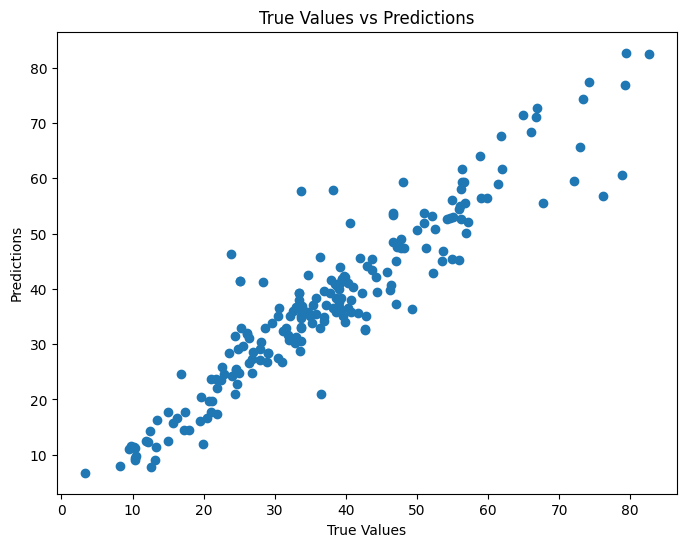

In [17]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_gridsearch)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# hyperopt

In [8]:
from hyperopt import hp, tpe, fmin, Trials

# Définir l'espace de recherche des hyperparamètres
space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(10,),(15,),(20,),(25,),(30,),(35,),(40,),(45,),(50,), (100,), (100, 50), (100, 100)]),
    'activation': hp.choice('activation', ['relu', 'tanh', 'identity', 'logistic']),
    'solver': hp.choice('solver', ['adam', 'lbfgs', 'sgd']),
    'alpha': hp.choice('alpha', [0.01, 0.05, 0.1, 0.4, 0.45, 0.45, 0.5, 0.55, 0.6, 1.0]),
    'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    'max_iter': hp.choice('max_iter', [500, 700, 1000]),
}

# Définir la fonction objectif pour l'optimisation des hyperparamètres
def objective(params):
    mlp = MLPRegressor(random_state=77, **params)
    mlp.fit(X_train_transformed, Y_train)
    y_pred = mlp.predict(X_test_transoformed)
    mse = mean_squared_error(Y_test, y_pred)
    return mse  # La fonction objectif retourne la MSE

# Initialiser un objet Trials pour stocker les résultats de chaque évaluation
trials = Trials()

# Trouver les meilleurs hyperparamètres avec hyperopt
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés par hyperopt :")
print(best)


  1%|          | 1/100 [00:02<04:10,  2.53s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



  2%|▏         | 2/100 [00:04<03:24,  2.08s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



  3%|▎         | 3/100 [00:05<03:01,  1.88s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



  5%|▌         | 5/100 [00:07<01:44,  1.10s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



  6%|▌         | 6/100 [00:08<01:45,  1.12s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



  8%|▊         | 8/100 [00:09<01:22,  1.12trial/s, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 10%|█         | 10/100 [00:11<01:02,  1.43trial/s, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 11%|█         | 11/100 [00:11<01:03,  1.41trial/s, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 12%|█▏        | 12/100 [00:14<01:49,  1.24s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 13%|█▎        | 13/100 [00:16<02:24,  1.66s/trial, best loss: 46.13024612493408]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 14%|█▍        | 14/100 [00:17<01:58,  1.38s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 15%|█▌        | 15/100 [00:19<02:02,  1.44s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 16%|█▌        | 16/100 [00:20<02:11,  1.56s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 17%|█▋        | 17/100 [00:22<01:56,  1.40s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 18%|█▊        | 18/100 [00:31<05:14,  3.83s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 20%|██        | 20/100 [00:33<03:20,  2.51s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 21%|██        | 21/100 [00:34<02:39,  2.02s/trial, best loss: 36.12096344753164]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 22%|██▏       | 22/100 [00:36<02:19,  1.78s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 23%|██▎       | 23/100 [00:37<02:03,  1.60s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 24%|██▍       | 24/100 [00:38<01:49,  1.44s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 25%|██▌       | 25/100 [00:49<05:19,  4.27s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 26%|██▌       | 26/100 [00:49<03:58,  3.23s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 27%|██▋       | 27/100 [00:51<03:17,  2.70s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 28%|██▊       | 28/100 [00:53<02:58,  2.48s/trial, best loss: 34.60161808069101]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 29%|██▉       | 29/100 [00:55<02:47,  2.36s/trial, best loss: 33.19945785522145]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 30%|███       | 30/100 [00:59<03:15,  2.79s/trial, best loss: 33.19945785522145]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 31%|███       | 31/100 [01:02<03:14,  2.82s/trial, best loss: 33.19945785522145]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 32%|███▏      | 32/100 [01:04<03:09,  2.79s/trial, best loss: 33.19945785522145]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 33%|███▎      | 33/100 [01:06<02:52,  2.57s/trial, best loss: 33.19945785522145]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 34%|███▍      | 34/100 [01:09<02:39,  2.42s/trial, best loss: 33.19945785522145]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 35%|███▌      | 35/100 [01:10<02:14,  2.07s/trial, best loss: 32.485272233194415]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 36%|███▌      | 36/100 [01:12<02:13,  2.09s/trial, best loss: 32.485272233194415]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 38%|███▊      | 38/100 [01:15<01:55,  1.86s/trial, best loss: 32.485272233194415]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 39%|███▉      | 39/100 [01:16<01:32,  1.52s/trial, best loss: 32.485272233194415]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 40%|████      | 40/100 [01:18<01:31,  1.53s/trial, best loss: 32.485272233194415]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 43%|████▎     | 43/100 [01:20<00:59,  1.04s/trial, best loss: 32.485272233194415]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 44%|████▍     | 44/100 [01:22<01:18,  1.40s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 45%|████▌     | 45/100 [01:24<01:26,  1.57s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 46%|████▌     | 46/100 [01:26<01:19,  1.46s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 48%|████▊     | 48/100 [01:29<01:27,  1.68s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 50%|█████     | 50/100 [01:32<01:27,  1.76s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 52%|█████▏    | 52/100 [01:34<01:08,  1.43s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 53%|█████▎    | 53/100 [01:37<01:15,  1.62s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 55%|█████▌    | 55/100 [01:48<02:24,  3.21s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 56%|█████▌    | 56/100 [01:50<02:01,  2.76s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 57%|█████▋    | 57/100 [01:52<01:46,  2.48s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 58%|█████▊    | 58/100 [01:53<01:28,  2.10s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 59%|█████▉    | 59/100 [01:54<01:20,  1.97s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 60%|██████    | 60/100 [02:01<02:12,  3.32s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 61%|██████    | 61/100 [02:02<01:49,  2.81s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 62%|██████▏   | 62/100 [02:05<01:42,  2.71s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 63%|██████▎   | 63/100 [02:07<01:27,  2.37s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 65%|██████▌   | 65/100 [02:08<00:56,  1.62s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 66%|██████▌   | 66/100 [02:12<01:15,  2.22s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 67%|██████▋   | 67/100 [02:16<01:29,  2.71s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 68%|██████▊   | 68/100 [02:18<01:24,  2.64s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 69%|██████▉   | 69/100 [02:21<01:20,  2.59s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 70%|███████   | 70/100 [02:23<01:16,  2.56s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 71%|███████   | 71/100 [02:25<01:10,  2.45s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 72%|███████▏  | 72/100 [02:30<01:26,  3.11s/trial, best loss: 31.505207371381115]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 73%|███████▎  | 73/100 [02:44<02:51,  6.34s/trial, best loss: 29.002695850241686]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 75%|███████▌  | 75/100 [03:01<03:19,  7.97s/trial, best loss: 29.002695850241686]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 76%|███████▌  | 76/100 [03:19<04:27, 11.14s/trial, best loss: 29.002695850241686]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 77%|███████▋  | 77/100 [03:34<04:43, 12.32s/trial, best loss: 29.002695850241686]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 79%|███████▉  | 79/100 [03:54<04:01, 11.52s/trial, best loss: 29.002695850241686]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 81%|████████  | 81/100 [04:11<03:17, 10.40s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 82%|████████▏ | 82/100 [04:25<03:28, 11.58s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 84%|████████▍ | 84/100 [04:45<02:52, 10.80s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 85%|████████▌ | 85/100 [04:58<02:55, 11.71s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 86%|████████▌ | 86/100 [05:00<01:59,  8.56s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 88%|████████▊ | 88/100 [05:10<01:24,  7.07s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 89%|████████▉ | 89/100 [05:12<01:02,  5.72s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 90%|█████████ | 90/100 [05:26<01:18,  7.82s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 91%|█████████ | 91/100 [05:31<01:03,  7.08s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 92%|█████████▏| 92/100 [05:32<00:43,  5.42s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 94%|█████████▍| 94/100 [05:41<00:30,  5.06s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 96%|█████████▌| 96/100 [05:43<00:13,  3.28s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 97%|█████████▋| 97/100 [05:44<00:08,  2.77s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(



 98%|█████████▊| 98/100 [05:58<00:11,  5.76s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 99%|█████████▉| 99/100 [05:58<00:04,  4.32s/trial, best loss: 25.658555016377242]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



100%|██████████| 100/100 [06:00<00:00,  3.61s/trial, best loss: 25.658555016377242]
Meilleurs hyperparamètres trouvés par hyperopt :
{'activation': 0, 'alpha': 0, 'hidden_layer_sizes': 11, 'learning_rate': 1, 'max_iter': 2, 'solver': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



In [9]:
# Listes des choix pour chaque hyperparamètre
activation_choices = ['relu', 'tanh', 'identity', 'logistic']
solver_choices = ['adam', 'lbfgs', 'sgd']
learning_rate_choices = ['constant', 'invscaling', 'adaptive']
max_iter_choices = [500, 700, 1000]
hidden_layer_sizes_choices = [(10,),(15,),(20,),(25,),(30,),(35,),(40,),(45,),(50,), (100,), (100, 50), (100, 100)]

# Récupérer les meilleures valeurs pour chaque hyperparamètre
best_activation = activation_choices[best['activation']]
best_solver = solver_choices[best['solver']]
best_learning_rate = learning_rate_choices[best['learning_rate']]
best_max_iter = max_iter_choices[best['max_iter']]
best_hidden_layer_sizes = hidden_layer_sizes_choices[best['hidden_layer_sizes']]

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés par hyperopt :")
print("Activation:", best_activation)
print("Solver:", best_solver)
print("Learning Rate:", best_learning_rate)
print("Max Iter:", best_max_iter)
print("Hidden Layer Sizes:", best_hidden_layer_sizes)


Meilleurs hyperparamètres trouvés par hyperopt :
Activation: relu
Solver: lbfgs
Learning Rate: invscaling
Max Iter: 1000
Hidden Layer Sizes: (100, 100)


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Les meilleurs hyperparamètres trouvés par hyperopt
best_activation = activation_choices[best['activation']]
best_solver = solver_choices[best['solver']]
best_learning_rate = learning_rate_choices[best['learning_rate']]
best_max_iter = max_iter_choices[best['max_iter']]
best_hidden_layer_sizes = hidden_layer_sizes_choices[best['hidden_layer_sizes']]

# Créer un nouveau modèle MLPRegressor avec les meilleurs hyperparamètres
best_model_hyperopt = MLPRegressor(
    activation=best_activation,
    solver=best_solver,
    learning_rate=best_learning_rate,
    max_iter=best_max_iter,
    hidden_layer_sizes=best_hidden_layer_sizes,
    random_state=77  # Assurez-vous de fixer la seed pour la reproductibilité
)

# Entraîner le modèle sur l'ensemble d'entraînement complet
best_model_hyperopt.fit(X_train_transformed, Y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_hyperopt = best_model_hyperopt.predict(X_test_transoformed)


# Évaluer le modèle avec les meilleurs hyperparamètres

mae_hyperopt = mean_absolute_error(Y_test, y_pred_hyperopt)
mse_hyperopt = mean_squared_error(Y_test, y_pred_hyperopt)
rmse_hyperopt = np.sqrt(mean_squared_error(Y_test, y_pred_hyperopt))
r_squared_hyperopt = r2_score(Y_test, y_pred_hyperopt)

print(f"Mean Squared Error on test set with best model found by hyperopt: {mae_hyperopt}")
print(f"Mean Squared Error on test set with best model found by hyperopt: {mse_hyperopt}")
print(f"Mean Squared Error on test set with best model found by hyperopt: {rmse_hyperopt}")
print(f"R-squared (R^2) on test set with best model found by hyperopt: {r_squared_hyperopt}")

Mean Squared Error on test set with best model found by hyperopt: 3.58229379441207
Mean Squared Error on test set with best model found by hyperopt: 28.806065035713925
Mean Squared Error on test set with best model found by hyperopt: 5.367128192591819
R-squared (R^2) on test set with best model found by hyperopt: 0.8895033489182738


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


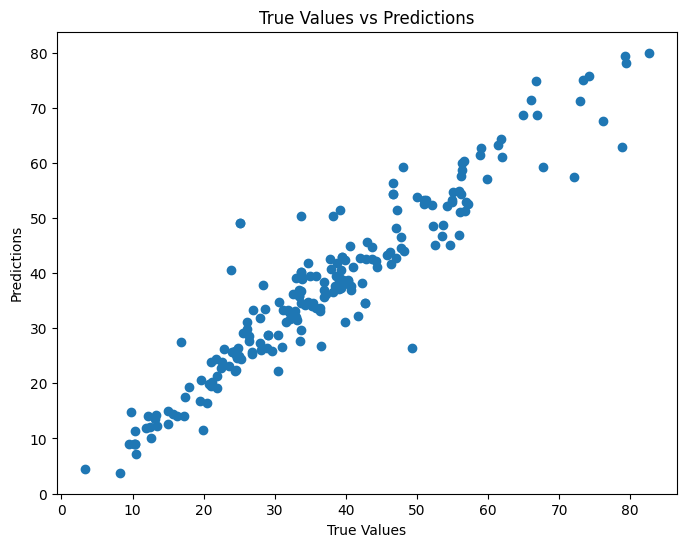

In [11]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_hyperopt)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# **tpot**

In [12]:
!pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=dd214adf1072da50e7afa159c5b655319dea7ffb875e84559b365d635d12dd77
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [15]:
from tpot import TPOTRegressor
# Initialiser TPOTRegressor avec le modèle MLPRegressor spécifié dans config_dict
config = {
    'sklearn.neural_network.MLPRegressor': {
        'hidden_layer_sizes': [(10,),(15,),(20,),(25,),(30,),(35,),(40,),(45,),(50,), (100,), (100, 50), (100, 100)],
        'activation': ['relu', 'tanh', 'identity', 'logistic'],
        'solver': ['adam', 'lbfgs', 'sgd'],
        'alpha': [0.01, 0.05, 0.1, 0.4, 0.45, 0.5, 0.55, 0.6, 1.0],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [500, 700, 1000]
    }
}



# Initialiser TPOTRegressor avec le config_dict restreint
tpot = TPOTRegressor(config_dict=config, generations=5, population_size=20, verbosity=2, random_state=42, scoring='neg_mean_squared_error')

# Entraînement du modèle TPOT
tpot.fit(X_train_transformed, Y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés par TPOT:")
print(tpot.fitted_pipeline_)

# Exporter le code Python du modèle
tpot.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -25.958871696185952

Generation 2 - Current best internal CV score: -25.958871696185952

Generation 3 - Current best internal CV score: -25.958871696185952

Generation 4 - Current best internal CV score: -25.958871696185952

Generation 5 - Current best internal CV score: -25.958871696185952

Best pipeline: MLPRegressor(input_matrix, activation=logistic, alpha=0.6, hidden_layer_sizes=(45,), learning_rate=invscaling, max_iter=500, solver=lbfgs)
Meilleurs hyperparamètres trouvés par TPOT:
Pipeline(steps=[('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.6,
                              hidden_layer_sizes=(45,),
                              learning_rate='invscaling', max_iter=500,
                              random_state=42, solver='lbfgs'))])


In [26]:
# Créer le modèle MLPRegressor
from sklearn.neural_network import MLPRegressor
mlp_Tpot =  MLPRegressor(activation='logistic', alpha=0.6,
                              hidden_layer_sizes=(45,),
                              learning_rate='invscaling', max_iter=500,
                              random_state=42, solver='lbfgs')


#Entraînement du modèle sur les données d'apprentissage
mlp_Tpot.fit(X_train_transformed, Y_train)

#prediction sur les données de test
y_pred_Tpot=mlp_Tpot.predict(X_test_transoformed)

#metrics
from sklearn.metrics import *
print('MAE : ',mean_absolute_error(Y_test, y_pred_Tpot))
print('MSE : ',mean_squared_error(Y_test, y_pred_Tpot))
print('RMSE : ',np.sqrt(mean_squared_error(Y_test, y_pred_Tpot)))
print("R-squared (R²) :", r2_score(Y_test, y_pred_Tpot))


MAE :  3.891977041527509
MSE :  34.28033026736
RMSE :  5.854940671549115
R-squared (R²) : 0.8685047163566906


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


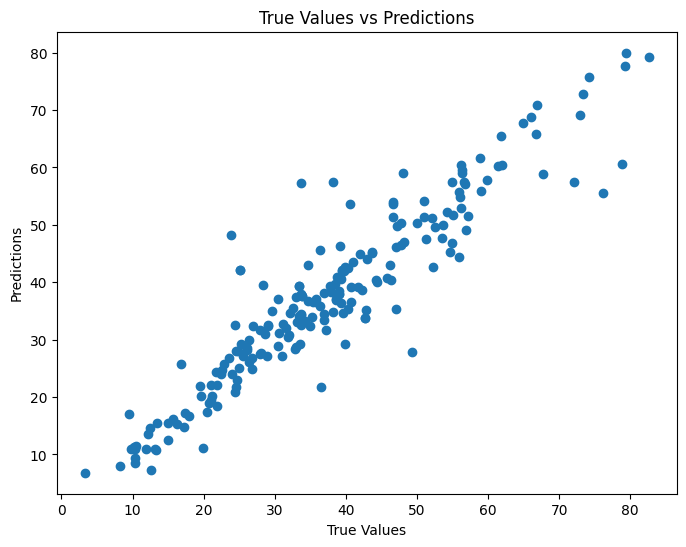

In [27]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_Tpot)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [ ]:
# Créer un modèle MLPRegressor avec les meilleurs hyperparamètres trouvés par TPOT

#best_hyperparams = tpot.fitted_pipeline_.get_params()['regressor']
#mlp_best = MLPRegressor(**best_hyperparams)

# Entraîner le modèle MLPRegressor avec les meilleurs hyperparamètres sur l'ensemble d'entraînement

#mlp_best.fit(X_train_transformed, Y_train)

# Prédictions sur l'ensemble de test

#y_pred = mlp_best.predict(X_test_transformed)

# Évaluation des performances du modèle

#mse = mean_squared_error(Y_test, y_pred)

# Affichage de la MSE

#print(f"Mean Squared Error on test set with best MLPRegressor model found by TPOT: {mse}")

In [ ]:
from tpot import TPOTRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# ... (entraînement du modèle TPOT)

# Accéder aux meilleurs hyperparamètres trouvés par TPOT
best_hyperparams = tpot.fitted_pipeline_.get_params()['mlpregressor']

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés par TPOT:")
print(best_hyperparams)

# Initialiser un modèle MLPRegressor avec les meilleurs hyperparamètres trouvés par TPOT
mlp_best = MLPRegressor(**best_hyperparams)

# Entraîner le modèle MLPRegressor avec les meilleurs hyperparamètres sur l'ensemble d'apprentissage
mlp_best.fit(X_train_transformed, Y_train)

# Prédictions sur l'ensemble de test
y_pred = mlp_best.predict(X_test_transformed)

# Évaluation des performances du modèle
mse = mean_squared_error(Y_test, y_pred)

# Affichage de la MSE
print(f"Mean Squared Error on test set with best MLPRegressor model found by TPOT: {mse}")


# Optimize hyperparameters of the model using **Optuna**

In [29]:
import optuna
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Supposons que X_train_transformed, X_test_transoformed, Y_train, Y_test sont déjà définis

# Définir l'objectif d'optimisation pour Optuna
def objective(trial):
    # Définir les espaces de recherche pour les hyperparamètres
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50), (100, 100)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'identity', 'logistic'])
    solver = trial.suggest_categorical('solver', ['adam', 'lbfgs', 'sgd'])
    alpha = trial.suggest_float('alpha', 0.01, 1.0)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    max_iter = trial.suggest_categorical('max_iter', [500, 700, 1000])

    # Initialiser le modèle avec les hyperparamètres suggérés
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=max_iter,
        random_state=77
    )

    # Entraîner le modèle sur les données d'entraînement
    mlp.fit(X_train_transformed, Y_train)

    # Prédictions sur l'ensemble de test
    y_pred = mlp.predict(X_test_transoformed)

    # Calculer la MSE (Mean Squared Error)
    mse = mean_squared_error(Y_test, y_pred)

    return mse

# Créer un objet Optuna pour optimiser les hyperparamètres
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Afficher les meilleurs hyperparamètres trouvés par Optuna
best_params = study.best_params
print("Meilleurs hyperparamètres trouvés par Optuna:")
print(best_params)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle final
best_model = MLPRegressor(**best_params, random_state=77)
best_model.fit(X_train_transformed, Y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test_transoformed)

# Calculer les performances du modèle final
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error on test set with best model found by Optuna: {mse}")


ModuleNotFoundError: ignored

In [ ]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error

# Initialisation de TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, scoring='neg_mean_squared_error')

# Recherche des meilleurs hyperparamètres et entraînement du modèle
tpot.fit(X_train_transformed, Y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred_tpot = tpot.predict(X_test_transoformed)
mse_tpot = mean_squared_error(Y_test, y_pred_tpot)
print(f"Mean Squared Error on test set with best model found by TPOT: {mse_tpot}")

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés par TPOT:")
print(tpot.fitted_pipeline_)

# Exporter le code Python du modèle
tpot.export('tpot_best_model.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -29.353209228074626

Generation 2 - Current best internal CV score: -29.353209228074626

Generation 3 - Current best internal CV score: -29.353209228074626

Generation 4 - Current best internal CV score: -29.040961413041636

Generation 5 - Current best internal CV score: -25.48153818507018

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.45, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Mean Squared Error on test set with best model found by TPOT: 24.10009644174356
Meilleurs hyperparamètres trouvés par TPOT:
Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.45,
                                       random_state=42))])


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ... Votre code existant pour charger et préparer les données ...

# Définition du modèle MLPRegressor
ANN_model = MLPRegressor(random_state=1, max_iter=(2000))